In [1]:
import joblib

# تحميل الـ preprocessor والبيانات بعد ال split
preprocessor = joblib.load("../models/preprocessor.pkl")
X_train_proc, X_test_proc, y_train, y_test = joblib.load("../models/splits.pkl")

print("X_train_proc shape:", X_train_proc.shape)
print("y_train shape:", y_train.shape)

X_train_proc shape: (242, 15)
y_train shape: (242,)


num__thalach     0.117806
num__cp          0.107712
cat__thal_3.0    0.106778
num__ca          0.101170
num__oldpeak     0.089440
num__age         0.088729
num__chol        0.087568
cat__thal_7.0    0.080281
num__trestbps    0.070011
num__slope       0.040763
dtype: float64


<Axes: title={'center': 'Top Features (Random Forest Importance)'}>

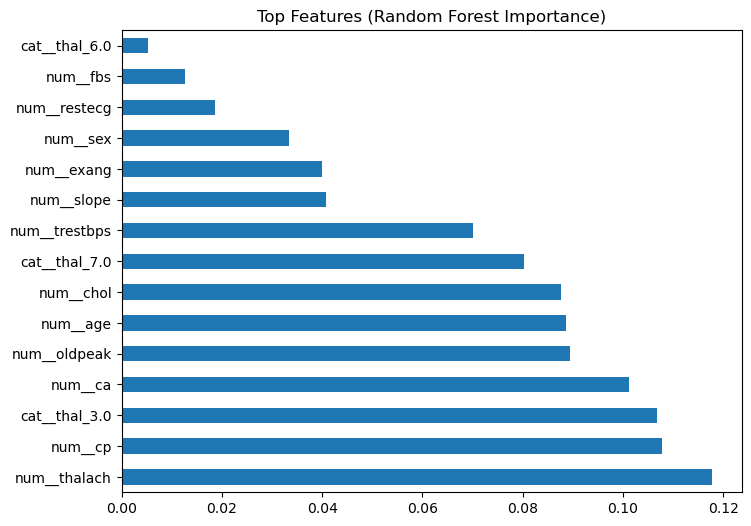

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_proc, y_train)

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Importance values
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Show top 10
print(feat_importance.head(10))

# Plot
feat_importance.head(15).plot(kind="barh", figsize=(8,6), title="Top Features (Random Forest Importance)")

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic Regression model for RFE
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

# Recursive Feature Elimination
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train_proc, y_train)

selected_features = pd.Series(rfe.support_, index=feature_names)
print("Selected Features (RFE):")
print(selected_features[selected_features == True].index.tolist())

Selected Features (RFE):
['num__sex', 'num__cp', 'num__trestbps', 'num__chol', 'num__thalach', 'num__exang', 'num__slope', 'num__ca', 'cat__thal_3.0', 'cat__thal_7.0']


In [6]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Scale X to [0,1] before chi2
X_train_scaled = MinMaxScaler().fit_transform(X_train_proc)

chi2_vals, p_vals = chi2(X_train_scaled, y_train)

chi2_scores = pd.Series(chi2_vals, index=feature_names).sort_values(ascending=False)

print("Top 10 Features (Chi-Square):")
print(chi2_scores.head(10))

Top 10 Features (Chi-Square):
cat__thal_7.0    39.245668
cat__thal_3.0    31.049576
num__exang       28.791571
num__ca          20.670175
num__slope        8.078705
num__oldpeak      7.544053
num__sex          7.320776
num__cp           5.699117
num__restecg      3.162825
num__thalach      2.010533
dtype: float64
